## 라이브러리 로드

In [ ]:
# 데이터 분석을 위한 pandas
# 수치 계산을 위한 numpy
# 데이터 시각화를 위한 matplotlib, seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(pd.__version__)
print(sns.__version__)

1.1.5
0.11.2


## 데이터셋 불러오기

In [ ]:
df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 히스토그램과 분포

In [ ]:
# 수치형 변수 mpg의 unique 값 보기
df["mpg"].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [ ]:
# 수치형 변수 mpg의 unique값의 갯수
df["mpg"].nunique()

129

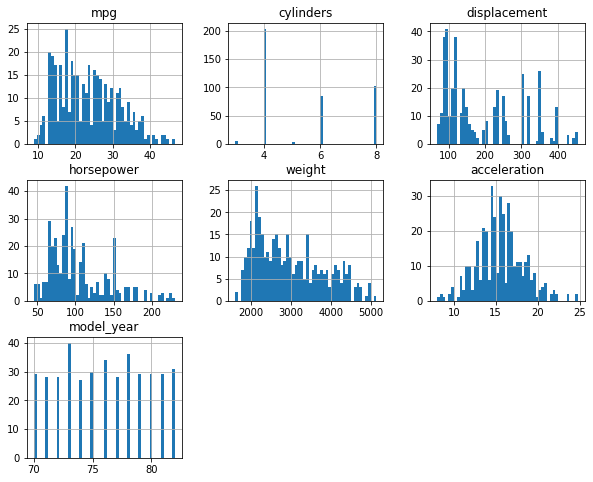

In [ ]:
# 전체 수치변수에 대한 히스토그램 그리기
# figsize : 그래프의 사이즈. 보통 (가로, 세로)로 표시
# bins : 그래프의 막대 갯수 = 데이터의 범위 
_ = df.hist(figsize=(10,8), bins = 50)

## 비대칭도 (왜도)

In [ ]:
# 전체 수치변수에 대한 왜도 구하기
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

## 첨도

In [ ]:
# 전체 수치변수에 대한 첨도 구하기
df.kurt()

mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

## 1개의 수치변수

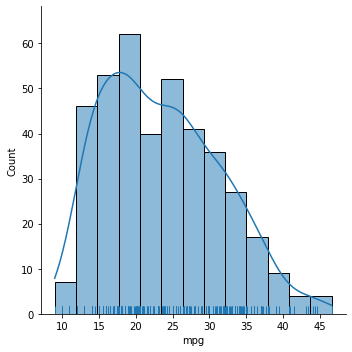

In [ ]:
#displot을 통해 히스토그램과 kdeplot, rugplot 그리기
sns.displot(data=df, x="mpg", kde=True, rug=True)

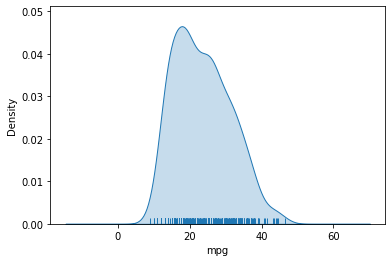

In [ ]:
#kdeplot, rugplot으로 밀도함수 표현하기
sns.kdeplot(data=df, x="mpg", shade=True, cut=10)
sns.rugplot(data=df, x="mpg")

In [ ]:
# mpg값에 대해 agg(aggrigation, 집합)로 skew(비대칭도), kurt(첨도) 값 구하기
df["mpg"].agg(["skew", "kurt"])

skew    0.457066
kurt   -0.510781
Name: mpg, dtype: float64

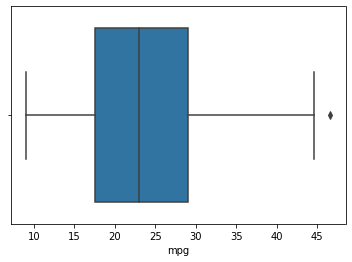

In [ ]:
# boxplot으로 mpg의 사분위수 표현
sns.boxplot(data=df, x="mpg")

In [ ]:
#describe로 mpg의 기술통계 값 구하기
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

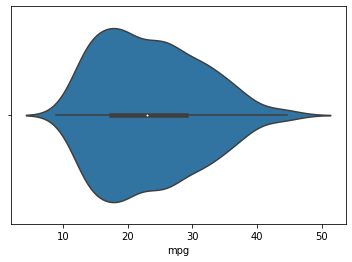

In [ ]:
# violinplot으로 mpg 값을 좀 더 자세히 보기
sns.violinplot(data=df, x="mpg")

## boxplot과 kdeplot(violinplot)

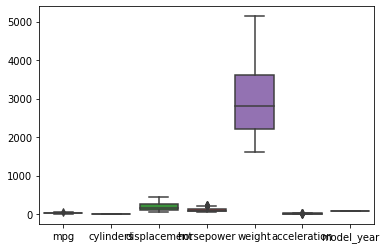

In [ ]:
# boxplot으로 전체 변수 시각화
sns.boxplot(data=df)

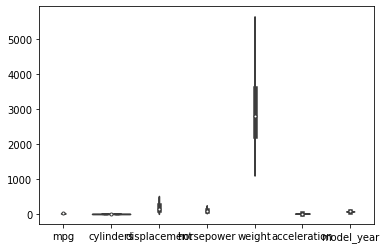

In [ ]:
# violinplot으로 전체 변수 시각화
sns.violinplot(data=df) 

## 2개의 수치변수 비교

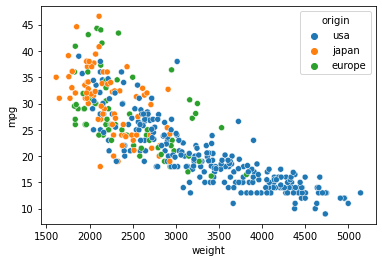

In [ ]:
# scatterplot을 통해 2개의 수치변수 비교하기
sns.scatterplot(data=df, x="weight", y="mpg", hue="origin")

# weight가 클수록 mpg(연비)는 떨어지는 것을 볼 수 있음

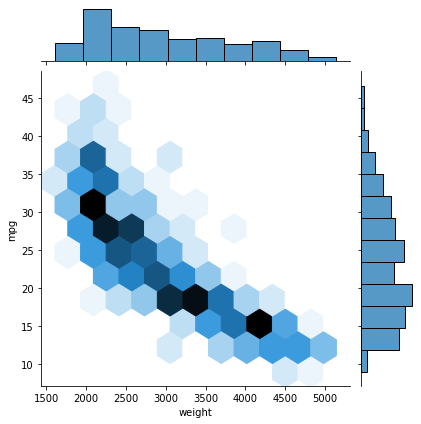

In [ ]:
# jointplot을 통해 2개의 수치변수 비교하기
# scatterplot + histogram
sns.jointplot(data=df, x="weight", y="mpg", kind="hex")

## 회귀 시각화

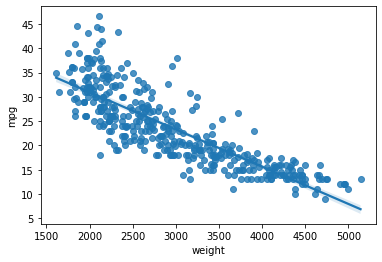

In [ ]:
# regplot으로 회귀선 그리기
sns.regplot(data=df, x="weight", y="mpg")

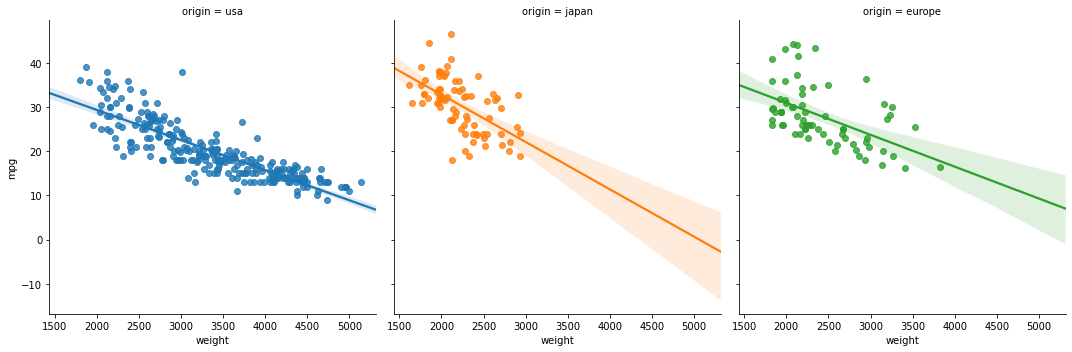

In [ ]:
# lmplot으로 범주값에 따라 색상, 서브플롯 그리기
sns.lmplot(data=df, x="weight", y="mpg", hue="origin", col="origin", truncate=False)

## 잔차 시각화

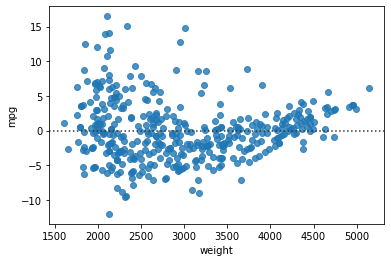

In [ ]:
# 회귀선의 잔차(Residual)를 시각화하기 (기울어진 회귀선을 수평으로 만들어 회귀선과 실제 값 사이 차이를 비교)
sns.residplot(data=df, x="weight", y="mpg")truncate=False

## pairplot

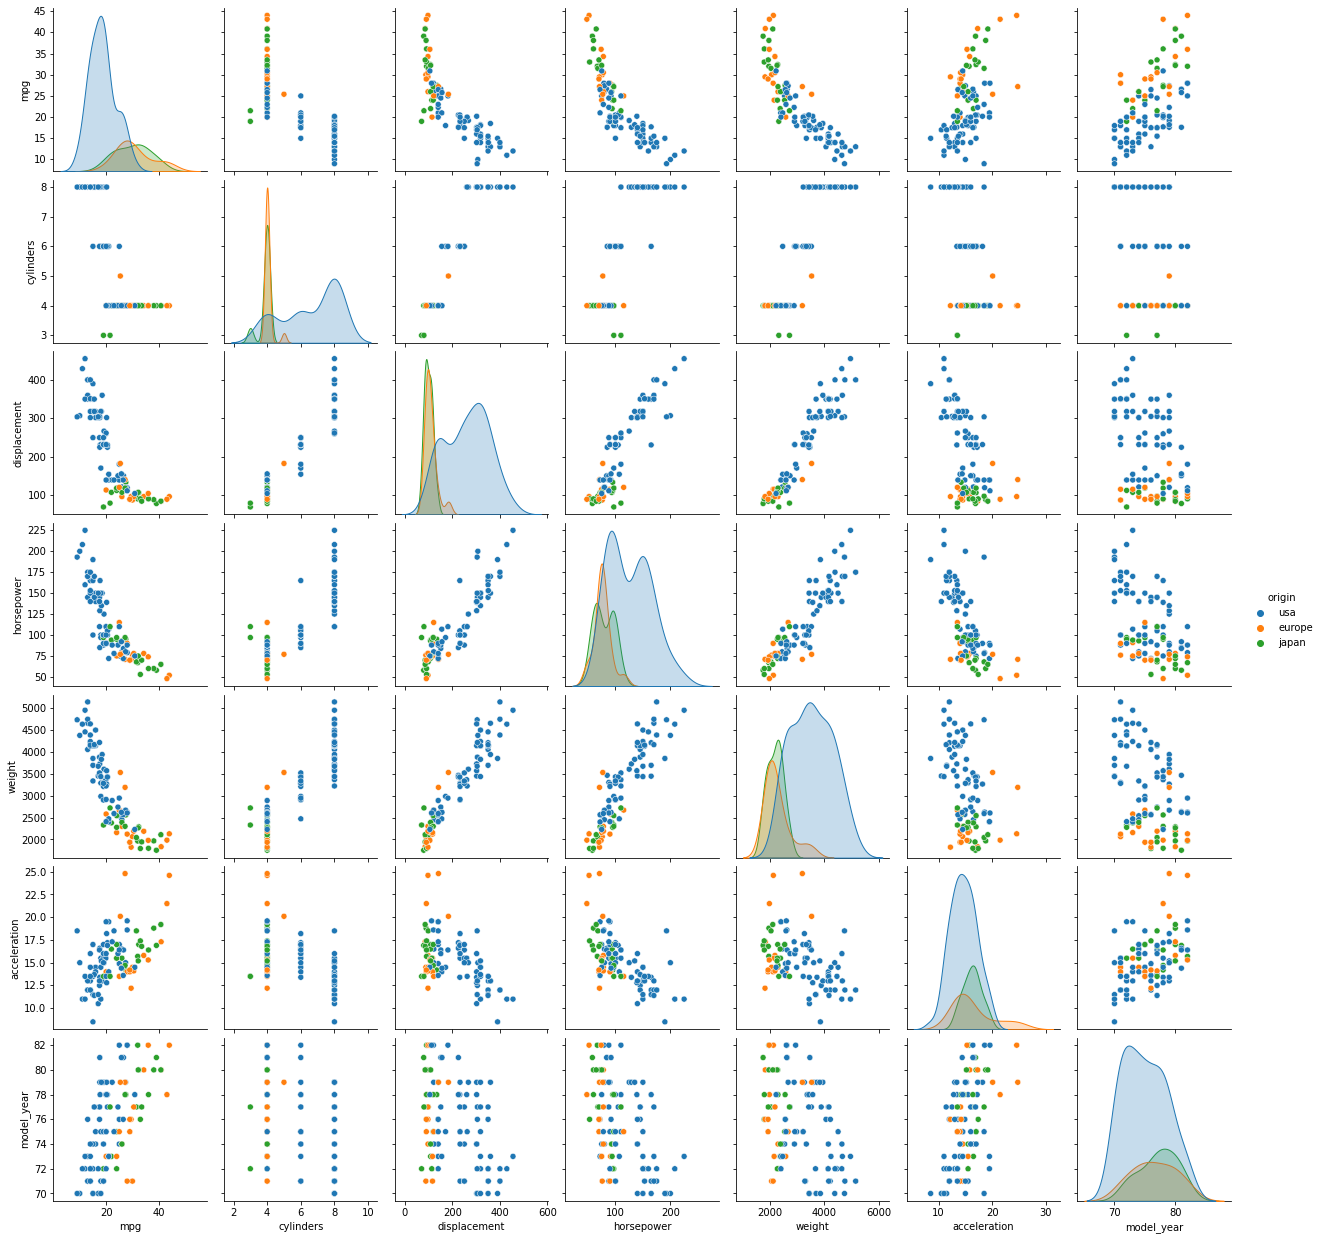

In [ ]:
# 모든 column들의 모든 값들을 비교해 그래프로 표현해줌
# pairplot은 시간이 오래 걸리므로 일부 샘플을 추출해 그려보고(100개)
# 샘플의 수를 늘려가며 그리는걸 추천 
df_sample = df.sample(100)

sns.pairplot(data=df_sample, hue="origin")

## lineplot

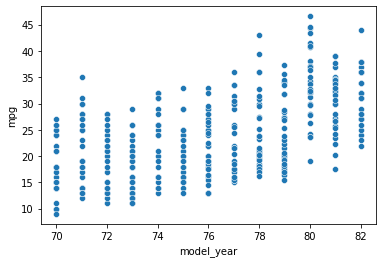

In [ ]:
sns.scatterplot(data=df, x="model_year", y="mpg")

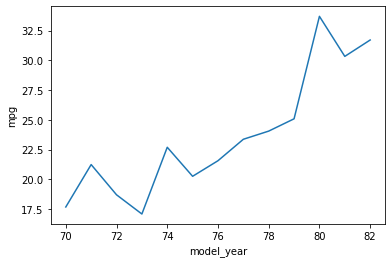

In [ ]:
# lineplot으로 model_year, mpg를 시각화하기
sns.lineplot(data=df, x="model_year", y="mpg", ci=None)

## relplot

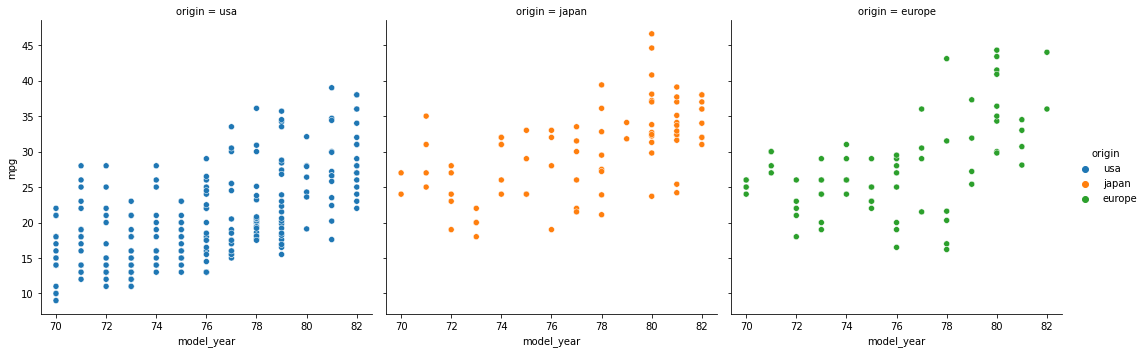

In [ ]:
# 수치형 변수에 대한 relation(관계)를 표현 -> 기본 scatterplot을 그리게 됨
# relplot으로 수치형 변수에 따라 서브플롯 그리기
sns.relplot(data=df, x="model_year", y="mpg", hue="origin", col="origin")

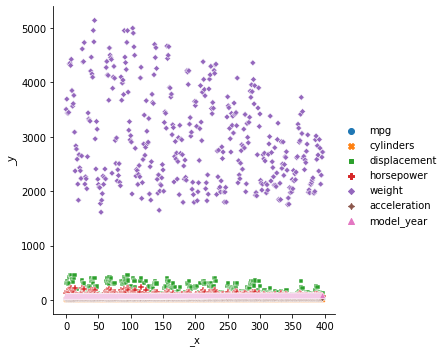

In [ ]:
# relplot으로 전체 수치 변수에 대한 시각화
sns.relplot(data=df)

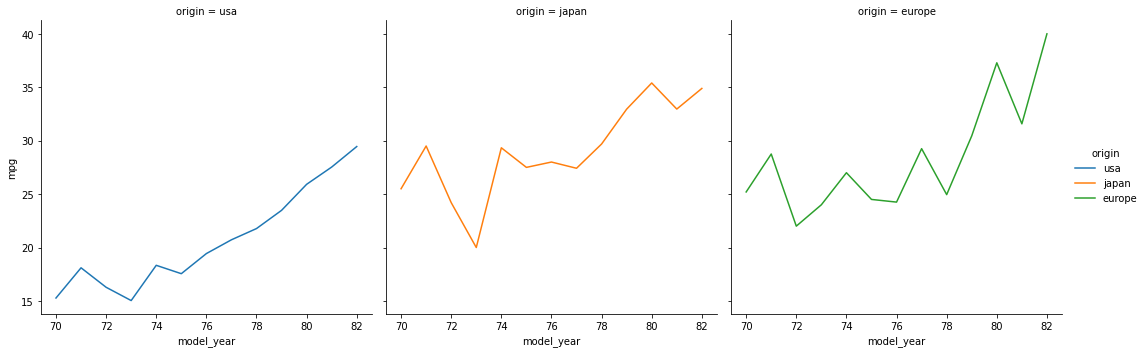

In [ ]:
# relplot의 kind옵션으로 선그래프 그리기
sns.relplot(data=df, x="model_year", y="mpg", hue="origin", col="origin", kind="line", ci=None)

## 상관분석

확률론과 통계학에서 두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법

모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용

In [ ]:
# dataframe 전체의 수치변수에 대해 상관계수를 구하기
corr = df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [ ]:
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 생성
# array([[1., 1., 1., 1., 1., 1., 1.],
#       [1., 1., 1., 1., 1., 1., 1.],
#       [1., 1., 1., 1., 1., 1., 1.],
#       [1., 1., 1., 1., 1., 1., 1.],
#       [1., 1., 1., 1., 1., 1., 1.],
#       [1., 1., 1., 1., 1., 1., 1.],
#       [1., 1., 1., 1., 1., 1., 1.]])

# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3] -------> [1 2 3]
# [4 5 6] -------> [0 5 6]
# [2 3 4] -------> [0 0 4]

mask = np.triu(np.ones_like(corr)) 
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

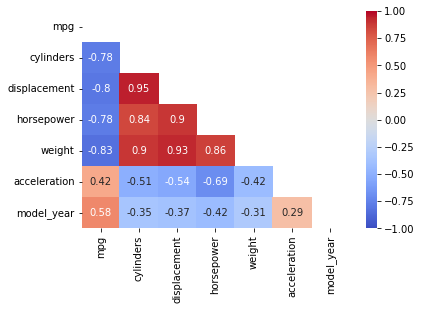

In [ ]:
# heatmap을 통해 상관계수 시각화
sns.heatmap(corr, annot=True, cmap="coolwarm", vmax=1, vmin=-1, mask=mask)